#Carga de archivos

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:



from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1MWuzLdvsM3sNklWE-4VKsdhDCzUR-yca"})   # replace the id with id of file you want to access
downloaded.GetContentFile('train') 
downloaded = drive.CreateFile({'id':"1ycXSAi-U1WwVXd1XPJPy6WvKt0Mla9Li"})   # replace the id with id of file you want to access
downloaded.GetContentFile('test') 

In [7]:
df = pd.read_parquet("train")


In [8]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

# Barplot

In [9]:
finde = df[["n_tokens_title" ,'shares' ]]


In [10]:
def catalogador(x):
    if x > 15:
      return "+15"
    elif x > 10:
      return "10-15"
    elif x > 5:
      return "5-10"
    else:
      return "0-5"

In [11]:
finde["nroPalabras"] = finde["n_tokens_title"].apply(lambda x: catalogador(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
grouped = finde.groupby('nroPalabras').agg({"shares": "mean"})
grouped

shares
nroPalabras             
+15          4069.522968
0-5          3042.302326
10-15        3578.994118
5-10         3343.351175

Text(0, 0.5, '# Palabras')

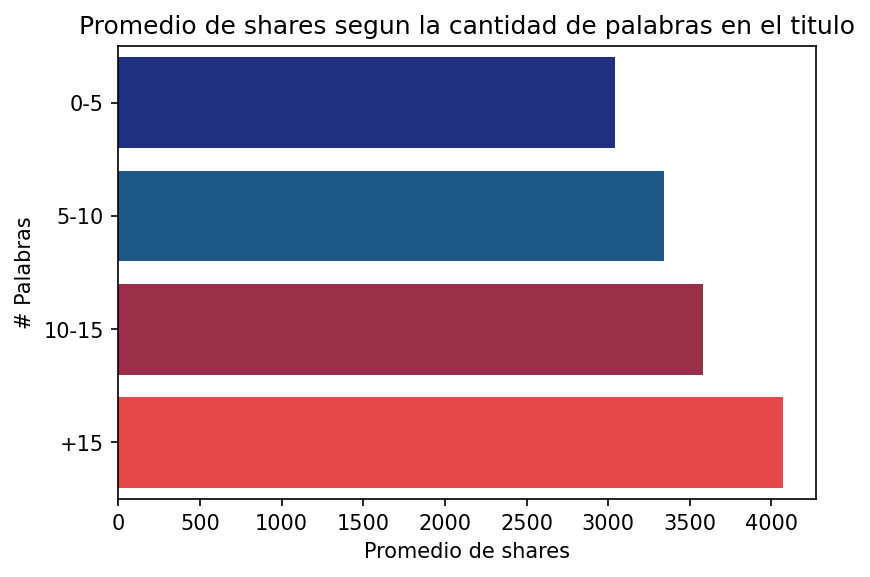

In [13]:


plt.figure(dpi=150)
plt.title("Promedio de shares segun la cantidad de palabras en el titulo")
sns.barplot(x=grouped["shares"].values, y= grouped.index, order=["0-5", "5-10", "10-15", "+15"], palette=["#0f2491",	"#0b5a98","#ab1d3f","#ff2e2e"])
plt.xlabel("Promedio de shares")
plt.ylabel("# Palabras")
# mayor cantidad de shares -> Popular
# con esto intuyo que titulos mas largos va a tender a ser mas popular

# Heatmap

eje horizontal: dias de la semana\
eje vertical: genero del articulo\
sumador: promedio de shares

In [14]:
#primero paso las 7 columnas de la semana a una sola
short = df[['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday']]
short

weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
0                    1.0                 0.0                   0.0   
1                    1.0                 0.0                   0.0   
2                    1.0                 0.0                   0.0   
3                    1.0                 0.0                   0.0   
4                    1.0                 0.0                   0.0   
...                  ...                 ...                   ...   
35658                0.0                 1.0                   0.0   
35659                0.0                 1.0                   0.0   
35660                0.0                 1.0                   0.0   
35661                0.0                 1.0                   0.0   
35662                0.0                 1.0                   0.0   

       weekday_is_thursday  weekday_is_friday  weekday_is_saturday  \
0                      0.0                0.0                  0.0   
1                      0.0                0.0                  0.0   
2                      0.0                0.0                  0.0   
3                      0.0                0.0                  0.0   
4                      0.0                0.0                  0.0   
...                    ...                ...                  ...   
35658                  0.0                0.0                  0.0   
35659                  0.0                0.0                  0.0   
35660                  0.0                0.0                  0.0   
35661                  0.0                0.0                  0.0   
35662                  0.0                0.0                  0.0   

       weekday_is_sunday  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
35658                0.0  
35659                0.0  
35660                0.0  
35661                0.0  
35662                0.0  

[35663 rows x 7 columns]

In [15]:
lunes = short["weekday_is_monday"].apply(lambda x: "1 Lunes" if x else None).dropna()
martes = short["weekday_is_tuesday"].apply(lambda x: "2 Martes" if x else None).dropna()
miercoles = short["weekday_is_wednesday"].apply(lambda x: "3 Miercoles" if x else None).dropna()
jueves = short["weekday_is_thursday"].apply(lambda x: "4 Jueves" if x else None).dropna()
viernes = short["weekday_is_friday"].apply(lambda x: "5 Viernes" if x else None).dropna()
sabado = short["weekday_is_saturday"].apply(lambda x: "6 Sabado" if x else None).dropna()
domingo = short["weekday_is_sunday"].apply(lambda x: "7 Domingo" if x else None).dropna()

In [16]:
dias = pd.concat([lunes,martes,miercoles,jueves,viernes,sabado,domingo]).sort_index()
dias

0         1 Lunes
1         1 Lunes
2         1 Lunes
3         1 Lunes
4         1 Lunes
           ...   
35658    2 Martes
35659    2 Martes
35660    2 Martes
35661    2 Martes
35662    2 Martes
Length: 35672, dtype: object

Hago lo mismo con el tema del articulo

In [17]:
genre = df[['data_channel_is_lifestyle','data_channel_is_entertainment', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world']]
genre.head(5)

data_channel_is_lifestyle  data_channel_is_entertainment  \
0                        0.0                            1.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            1.0   
4                        0.0                            0.0   

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                  0.0                     0.0                   0.0   
1                  1.0                     0.0                   0.0   
2                  1.0                     0.0                   0.0   
3                  0.0                     0.0                   0.0   
4                  0.0                     0.0                   1.0   

   data_channel_is_world  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0

In [18]:
lifestyle	= genre['data_channel_is_lifestyle'].apply(lambda x: "lifestyle" if x else None).dropna()
entertainment = genre["data_channel_is_entertainment"].apply(lambda x: "entertainment" if x else None).dropna()	
bus = genre["data_channel_is_bus"].apply(lambda x: "bus" if x else None).dropna()
socmed = genre["data_channel_is_socmed"].apply(lambda x: "socmed" if x else None).dropna()
tech = genre["data_channel_is_tech"].apply(lambda x: "tech" if x else None).dropna()	
world = genre["data_channel_is_world"].apply(lambda x: "world" if x else None).dropna() 

In [19]:
generes = pd.concat([lifestyle	,entertainment	,bus	,socmed	,tech	,world]).sort_index()
generes

0        entertainment
1                  bus
2                  bus
3        entertainment
4                 tech
             ...      
35657    entertainment
35659    entertainment
35660    entertainment
35661    entertainment
35662    entertainment
Length: 30208, dtype: object

In [20]:
genre = generes.to_frame(name="genre")

In [21]:
dias = dias.to_frame(name="dia")


In [22]:
#los articulos en los cuales no tengo idea a cual pertenecen no los considero
hm = dias.join(genre, how="inner")

In [23]:
#por ultimo agrego el share

In [24]:
heatMap = hm.join(df[["shares", "url", "surprise1"]])
heatMap

dia          genre  shares  \
0       1 Lunes  entertainment     593   
1       1 Lunes            bus     711   
2       1 Lunes            bus    1500   
3       1 Lunes  entertainment    1200   
4       1 Lunes           tech     505   
...         ...            ...     ...   
35657  2 Martes  entertainment     653   
35659  2 Martes  entertainment    2300   
35660  2 Martes  entertainment     567   
35661  2 Martes  entertainment     783   
35662  2 Martes  entertainment    1400   

                                                     url     surprise1  
0      http://mashable.com/2013/01/07/amazon-instant-...     the world  
1      http://mashable.com/2013/01/07/ap-samsung-spon...      business  
2      http://mashable.com/2013/01/07/apple-40-billio...     the world  
3      http://mashable.com/2013/01/07/astronaut-notre...        sports  
4       http://mashable.com/2013/01/07/att-u-verse-apps/     the world  
...                                                  ...           ...  
35657  http://mashable.com/2014/10/28/cookie-monster-...     the world  
35659  http://mashable.com/2014/10/28/dancing-with-th...     the world  
35660  http://mashable.com/2014/10/28/dangerous-airpo...     the world  
35661  http://mashable.com/2014/10/28/disney-villains...     the world  
35662  http://mashable.com/2014/10/28/doctor-who-mons...  science/tech  

[30217 rows x 5 columns]

In [25]:
matrix = pd.pivot_table(heatMap, values='shares', index='genre', columns='dia', aggfunc="mean")
matrix

dia                1 Lunes     2 Martes  3 Miercoles     4 Jueves  \
genre                                                               
bus            4028.211610  2982.653811  2736.845695  2978.419807   
entertainment  3006.457890  2722.421144  2939.253484  2883.562444   
lifestyle      4548.434028  4228.836013  3307.905556  3582.246988   
socmed         4091.446875  3555.477477  3645.208333  3130.065315   
tech           2829.664894  2939.215959  3443.915280  2766.816492   
world          2586.758621  2212.276547  1934.927013  2517.513878   

dia              5 Viernes     6 Sabado    7 Domingo  
genre                                                 
bus            2401.165138  4418.991228  3571.107256  
entertainment  3094.283429  3475.797101  3806.652893  
lifestyle      3101.653979  4255.849398  3753.191710  
socmed         4064.528481  3329.363636  4524.827068  
tech           3087.079741  3608.933198  3987.263158  
world          2263.522523  2729.760766  2494.083516

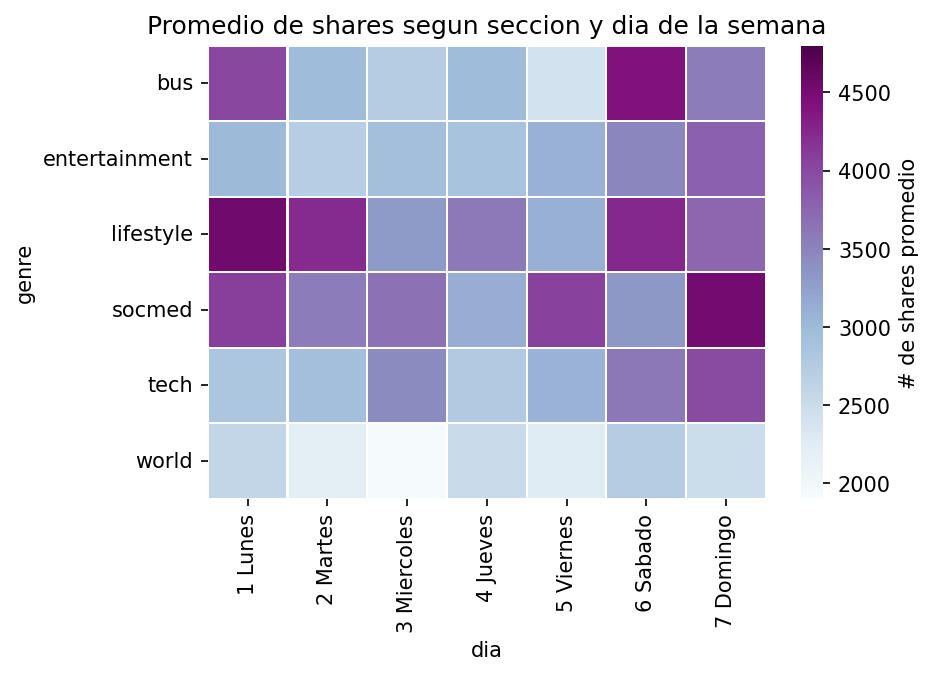

In [26]:
plt.figure(dpi=150)
plt.title("Promedio de shares segun seccion y dia de la semana")
sns.heatmap(matrix, cmap="BuPu",linewidths=.5 ,vmin=1900 ,vmax=4800, cbar_kws={'label': '# de shares promedio'})

# Boxplot

Otra visu

In [27]:
sub = df[['num_imgs', 'popular', "url"]]
subMenos15 = sub[sub["num_imgs"] < 15]
subMenos15
# para los articulos de menos de 15 imagenes, vemos que es mucho mas probable que si tiene mas sea popular

num_imgs  popular                                                url
0           1.0    False  http://mashable.com/2013/01/07/amazon-instant-...
1           1.0    False  http://mashable.com/2013/01/07/ap-samsung-spon...
2           1.0    False  http://mashable.com/2013/01/07/apple-40-billio...
3           1.0    False  http://mashable.com/2013/01/07/astronaut-notre...
5           0.0    False   http://mashable.com/2013/01/07/beewi-smart-toys/
...         ...      ...                                                ...
35658       0.0     True  http://mashable.com/2014/10/28/cree-led-light-...
35659       9.0    False  http://mashable.com/2014/10/28/dancing-with-th...
35660       1.0    False  http://mashable.com/2014/10/28/dangerous-airpo...
35661      12.0    False  http://mashable.com/2014/10/28/disney-villains...
35662       2.0    False  http://mashable.com/2014/10/28/doctor-who-mons...

[32216 rows x 3 columns]

Text(0, 0.5, '# Imagenes')

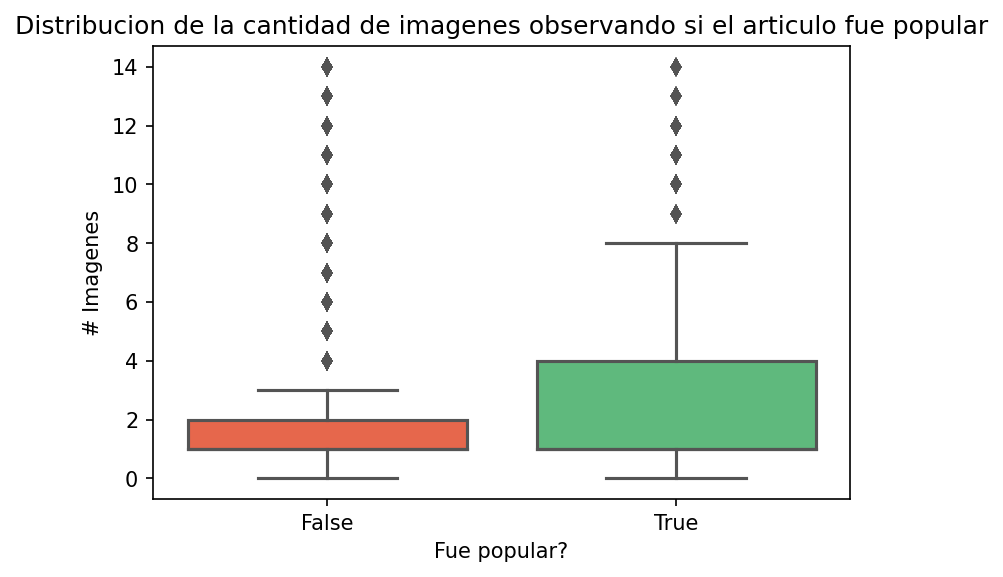

In [28]:
fig = plt.figure(dpi=150)
plt.title("Distribucion de la cantidad de imagenes observando si el articulo fue popular")
sns.boxplot( x=subMenos15["popular"], y=subMenos15["num_imgs"], palette=["#FF5733","#50C878"]);
plt.xlabel("Fue popular?")
plt.ylabel("# Imagenes")

# Violinplot

In [29]:
def sep(x):
  if x>712:
    return "75-100%"
  elif 406<x<712:
    return "50-75%"
  elif 245<x<406:
    return "25-50%"
  else:
     return "0-25%"

In [30]:
sub = df[["n_tokens_content", "shares"]]
sub["n_tokens_content"] = sub["n_tokens_content"].apply(lambda x: sep(x)) 
sub = sub[sub["shares"] < 200]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
sub

n_tokens_content  shares
4709             0-25%       4
7274           75-100%     112
7655            50-75%      98
7681            50-75%     163
7697             0-25%      70
...                ...     ...
34935           50-75%      83
35068            0-25%     112
35193           50-75%      36
35252            0-25%     111
35327          75-100%      28

[146 rows x 2 columns]

In [32]:
sub["n_tokens_content"].describe()

count        146
unique         4
top       50-75%
freq          55
Name: n_tokens_content, dtype: object

Text(0, 0.5, '# shares')

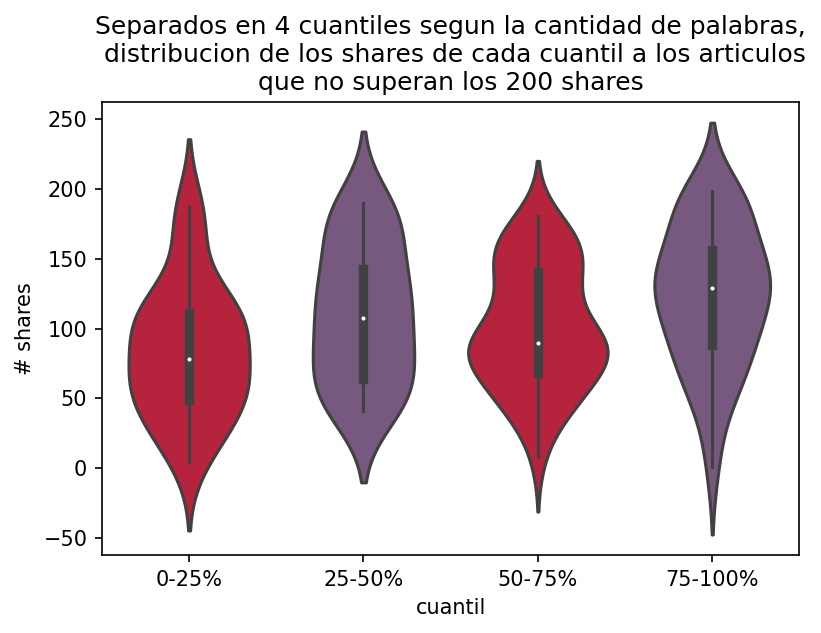

In [33]:
fig = plt.figure(dpi=150)
plt.title("Separados en 4 cuantiles segun la cantidad de palabras,\n distribucion de los shares de cada cuantil a los articulos\n que no superan los 200 shares ")
sns.violinplot(data = sub, y="shares", x="n_tokens_content" , palette=["#cf0a2c", "#7a5286" ], order = ["0-25%", "25-50%", "50-75%", "75-100%"])
plt.xlabel("cuantil")
plt.ylabel("# shares")

# Treemap

In [34]:
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
surp2 = df[["surprise2", "shares"]]
surp2 = surp2.loc[surp2["surprise2"] != ""] # esta visu lo hago con los valores que tienen calculado
surp2["surprise2"] = surp2["surprise2"].apply(lambda x: x.split(','))
surp2["ao"] = surp2["surprise2"].apply(lambda x: x[0])
surp2["a1"] = surp2["surprise2"].apply(lambda x: x[1])

In [36]:
a0 = surp2['ao'].value_counts()

In [37]:
a1 = surp2['a1'].value_counts()

In [38]:
sums = a0.add(a1, fill_value=0)
sums["other"] = 92 + 23+ 12 + 1 # junto a todas las emociones menos nombras en other

In [39]:
sums = sums[sums > 93].sort_values(ascending=True).iloc[::-1]

In [40]:
colors = ['#b7094c','#d12c6c','#ef233c','#e76f51','#de7a62','#e37f66' ,'#e8ac65','#f79d65','#f9dc5c','#fae588',"#f7e8a3","#faefbe"]
sizes= sums.values
label=sums.index

sizes

array([9689., 5692., 3647., 2251., 1732., 1428., 1107.,  979.,  509.,
        247.,  243.,  128.])

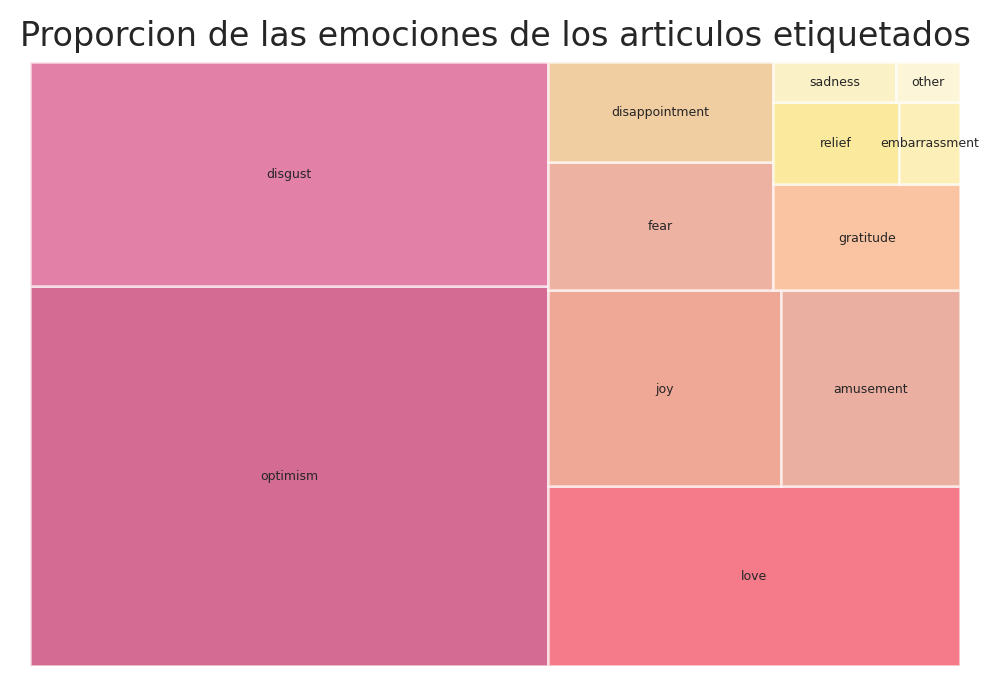

In [41]:
sns.set_style(style="whitegrid") # set seaborn plot style
plt.figure(dpi=200)
squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors, text_kwargs={'fontsize':4.5}).set(title='Proporcion de las emociones de los articulos etiquetados')
plt.axis('off')
plt.show()

# Barplot

In [42]:
df['url'][0].split("/")[3]

'2013'

In [43]:
sub = df.sort_values("timedelta")[["url","shares", "popular" ]]
sub["month"] = sub['url'].apply(lambda x: int(x.split("/")[4]))

In [44]:
groupedByMonth = sub.groupby("month").agg({"popular":["mean"]})

In [45]:
lvl0 = groupedByMonth.columns.get_level_values(0)
lvl1 = groupedByMonth.columns.get_level_values(1)

groupedByMonth.columns = lvl0 + "_" + lvl1

In [46]:
groupedByMonth = groupedByMonth.reset_index()

In [47]:
groupedByMonth

month  popular_mean
0       1      0.201130
1       2      0.206102
2       3      0.236399
3       4      0.211023
4       5      0.205891
5       6      0.175037
6       7      0.183048
7       8      0.190604
8       9      0.200176
9      10      0.176220
10     11      0.234421
11     12      0.247801

In [48]:
colors = ["#06283D", "#1363DF", "#47B5FF","#FFD59E" ,"#F9FFA4" ,"#B4FF9F" ,"#FAC213","#F77E21","#D61C4E", "#606c38", '#dda15e', "#bc6c25" ]
# idea, marcar la estacion del año en colores (USA)

Text(0, 0.5, 'Promedio de articulos popular')

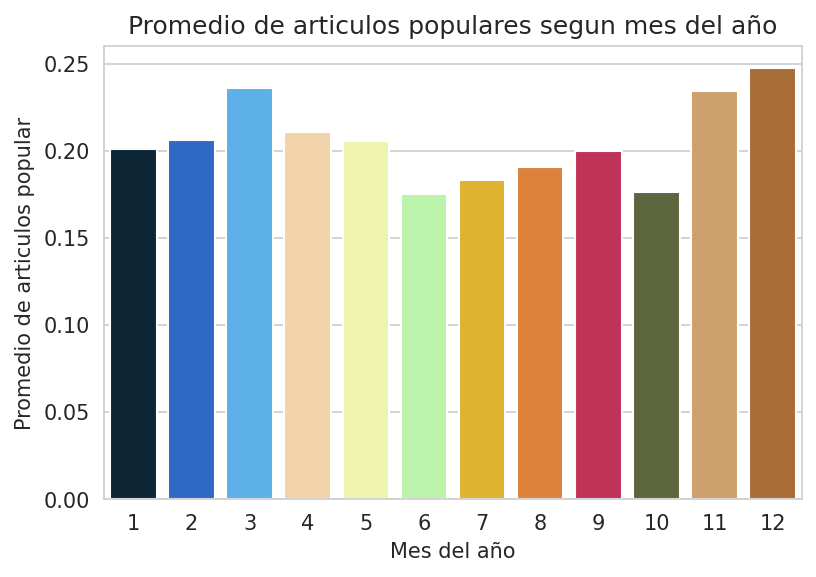

In [49]:
plt.figure(dpi=150)
plt.title("Promedio de articulos populares segun mes del año")
sns.barplot(data=groupedByMonth,x="month", y= "popular_mean", palette=colors)
plt.xlabel("Mes del año")
plt.ylabel("Promedio de articulos popular")